# 은긍코치_07팀 2주차 미션 제출 (22/11/08)

## Q1. 전국 시도별 약국수 구하기   
* 상권업종소분류명이 약국인 것을 찾아 빈도수 구하기.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

plt.rc('font', family='Malgun Gothic')
%matplotlib inline

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [8]:
print(df.loc[df["상권업종소분류명"]=="약국", "시도명"].value_counts().to_string())

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99


## Q2. 동물병원의 빈도수 구하기
* 동물병원의 빈도수 구하기   
* 시각화 하기

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64


<AxesSubplot: xlabel='시도명', ylabel='count'>

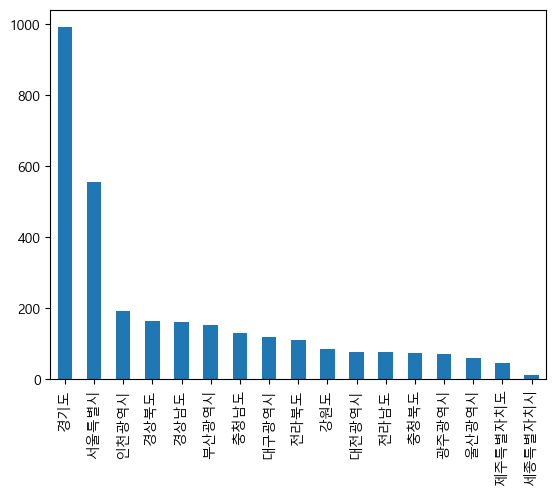

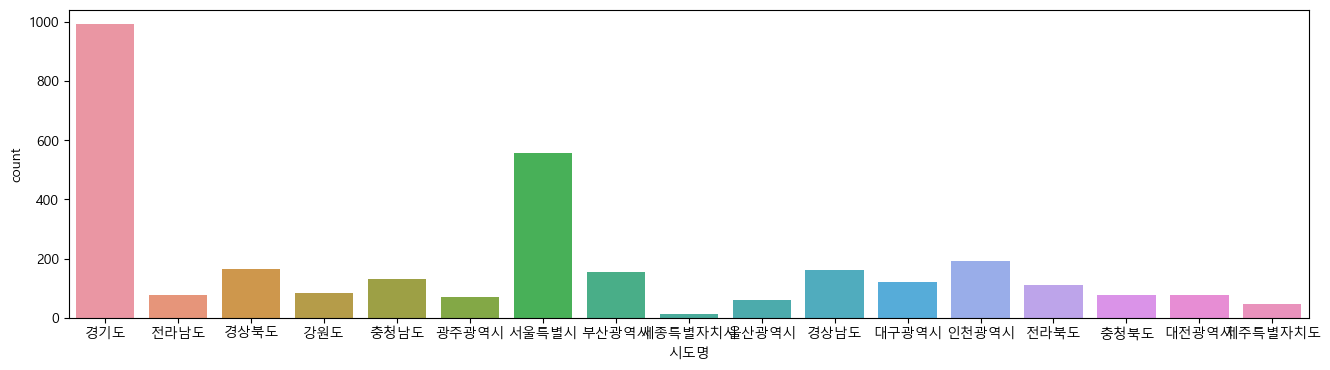

In [16]:
# 빈도수 구하기
print(df.loc[df["상권업종소분류명"]=="동물병원","시도명"].value_counts())

# 시각화 하기
df_animal_hospital = df[df['상권업종소분류명']=='동물병원'].copy()
df_animal_hospital.head(3)

# bar
df_animal_hospital["시도명"].value_counts().plot.bar()

# sns
plt.figure(figsize=(16,4))
sns.countplot(data=df_animal_hospital, x='시도명')

## Q3. 강남지역 피부과/성형외과 타지역 분포 비교 비율
* 피부/성형의 분류명으로 병원 찾기 
* 피부과 성형외과 수 / 전체 병원 수로 비율 구하기
* 비율이 높은 순서대로 정렬하기 
* 소숫점 두 번째짜리까지 출력하기

In [25]:
print ("시군구명")
print(round(df.loc[(df["시도명"]=="서울특별시")&(df["상권업종소분류명"].str.contains("피부|성형")),"시군구명"].value_counts(normalize=True),2).to_string())

시군구명
강남구     0.44
서초구     0.15
송파구     0.03
마포구     0.03
영등포구    0.03
강서구     0.03
광진구     0.03
강동구     0.03
중구      0.02
은평구     0.02
서대문구    0.02
성북구     0.02
동대문구    0.02
양천구     0.02
노원구     0.02
중랑구     0.02
성동구     0.01
구로구     0.01
관악구     0.01
동작구     0.01
강북구     0.01
종로구     0.01
용산구     0.01
금천구     0.01
도봉구     0.00


## Q4. '노인/치매병원' 지도로 위치 표시
* folium을 통해 전국 '노인/치매병원'표시

In [28]:
# 노인/치매병원 데이터만 가지고 있는 데이터프레임 생성
geriatric_dementia = df[df["상권업종소분류명"] == "노인/치매병원"]
print(geriatric_dementia.shape)
geriatric_dementia.head(2)

(1055, 39)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
21,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110.0,46610.0,NaN,1,NaN,129.040773,35.209154
62,21511155,노경회,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,4623035023110240001000001,NaN,전라남도 광양시 진월면 용소길 7,545851.0,57713.0,NaN,1,NaN,127.746981,34.986585


In [30]:
map = folium.Map(location=[geriatric_dementia["위도"].mean(), geriatric_dementia["경도"].mean()],
                zoom_start=7)

for n in geriatric_dementia.index:
    name = geriatric_dementia.loc[n, "상호명"]
    address = geriatric_dementia.loc[n, "도로명주소"]
    location = [geriatric_dementia.loc[n, "위도"], geriatric_dementia.loc[n, "경도"]]
    
    folium.Marker(
        location = location,
        tooltip=name,
        popup = address,
        icon=folium.Icon(color="green", icon="info", prefix="fa")
    ).add_to(map)
map